
# Text processing

## 1- Tockenization

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.text import TextCollection
from nltk.collocations import BigramCollocationFinder
from nltk.metrics.association import BigramAssocMeasures
from pprint import pprint
import re
from collections import Counter
label_size = 16
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/afillatre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sampleText = "Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of understanding the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves."

In [ ]:
tokens = nltk.word_tokenize(sampleText, 'english')
pprint(tokens)

['Natural',
 'language',
 'processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'subfield',
 'of',
 'linguistics',
 ',',
 'computer',
 'science',
 ',',
 'and',
 'artificial',
 'intelligence',
 'concerned',
 'with',
 'the',
 'interactions',
 'between',
 'computers',
 'and',
 'human',
 'language',
 ',',
 'in',
 'particular',
 'how',
 'to',
 'program',
 'computers',
 'to',
 'process',
 'and',
 'analyze',
 'large',
 'amounts',
 'of',
 'natural',
 'language',
 'data',
 '.',
 'The',
 'goal',
 'is',
 'a',
 'computer',
 'capable',
 'of',
 'understanding',
 'the',
 'contents',
 'of',
 'documents',
 ',',
 'including',
 'the',
 'contextual',
 'nuances',
 'of',
 'the',
 'language',
 'within',
 'them',
 '.',
 'The',
 'technology',
 'can',
 'then',
 'accurately',
 'extract',
 'information',
 'and',
 'insights',
 'contained',
 'in',
 'the',
 'documents',
 'as',
 'well',
 'as',
 'categorize',
 'and',
 'organize',
 'the',
 'documents',
 'themselves',
 '.']


In [ ]:
textTokens = sampleText.split() # by default split by spaces
textTokens

['Natural',
 'language',
 'processing',
 '(NLP)',
 'is',
 'a',
 'subfield',
 'of',
 'linguistics,',
 'computer',
 'science,',
 'and',
 'artificial',
 'intelligence',
 'concerned',
 'with',
 'the',
 'interactions',
 'between',
 'computers',
 'and',
 'human',
 'language,',
 'in',
 'particular',
 'how',
 'to',
 'program',
 'computers',
 'to',
 'process',
 'and',
 'analyze',
 'large',
 'amounts',
 'of',
 'natural',
 'language',
 'data.',
 'The',
 'goal',
 'is',
 'a',
 'computer',
 'capable',
 'of',
 'understanding',
 'the',
 'contents',
 'of',
 'documents,',
 'including',
 'the',
 'contextual',
 'nuances',
 'of',
 'the',
 'language',
 'within',
 'them.',
 'The',
 'technology',
 'can',
 'then',
 'accurately',
 'extract',
 'information',
 'and',
 'insights',
 'contained',
 'in',
 'the',
 'documents',
 'as',
 'well',
 'as',
 'categorize',
 'and',
 'organize',
 'the',
 'documents',
 'themselves.']

In [ ]:
print ("The sample text has {} tokens".format (len(textTokens)))

In [ ]:
print ("The sample text has {} tokens".format (len(tokens)))

### Tockenize by Sentences

In [ ]:
sentences = nltk.sent_tokenize(sampleText, 'english')
pprint(sentences)

['Natural language processing (NLP) is a subfield of linguistics, computer '
 'science, and artificial intelligence concerned with the interactions between '
 'computers and human language, in particular how to program computers to '
 'process and analyze large amounts of natural language data.',
 'The goal is a computer capable of understanding the contents of documents, '
 'including the contextual nuances of the language within them.',
 'The technology can then accurately extract information and insights '
 'contained in the documents as well as categorize and organize the documents '
 'themselves.']


### Tokens frequency

In [ ]:
from collections import Counter
totalWords = Counter(tokens);
totalWords

Counter({'Natural': 1,
         'language': 4,
         'processing': 1,
         '(': 1,
         'NLP': 1,
         ')': 1,
         'is': 2,
         'a': 2,
         'subfield': 1,
         'of': 5,
         'linguistics': 1,
         ',': 4,
         'computer': 2,
         'science': 1,
         'and': 5,
         'artificial': 1,
         'intelligence': 1,
         'concerned': 1,
         'with': 1,
         'the': 6,
         'interactions': 1,
         'between': 1,
         'computers': 2,
         'human': 1,
         'in': 2,
         'particular': 1,
         'how': 1,
         'to': 2,
         'program': 1,
         'process': 1,
         'analyze': 1,
         'large': 1,
         'amounts': 1,
         'natural': 1,
         'data': 1,
         '.': 3,
         'The': 2,
         'goal': 1,
         'capable': 1,
         'understanding': 1,
         'contents': 1,
         'documents': 3,
         'including': 1,
         'contextual': 1,
         'nuances': 1,
    

There are a number of problems:

some word (like The/THE or You/you) is in two different tokens because of capital vs. small letter
some token contains punctuation marks which makes the same word counted twice
same token consists of symbols (like *)

### Remove capital letters

In [ ]:
loweredText = sampleText.lower()

### Remove punctuation and trailing spaces

In [ ]:
strippedText = loweredText.strip()
strippedText

'natural language processing (nlp) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. the goal is a computer capable of understanding the contents of documents, including the contextual nuances of the language within them. the technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.'

To remove punctuaction we can use regular expressions.
Regular expression are very powerful for match patterns in a sequence of characters.

In [ ]:
import re
processedText = re.sub(r'[^a-z0-9\s]', '', strippedText) # keep only numbers and letters
processedText

'natural language processing nlp is a subfield of linguistics computer science and artificial intelligence concerned with the interactions between computers and human language in particular how to program computers to process and analyze large amounts of natural language data the goal is a computer capable of understanding the contents of documents including the contextual nuances of the language within them the technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves'

Another useful symbol is \w which match ANY alphanumeric character or \W which matches any NON alphanumeric character.
So, an alternative way could be:

In [ ]:
processedText = re.sub(r'[^\s\w]', '', strippedText) # remove punctuation
processedText

'natural language processing nlp is a subfield of linguistics computer science and artificial intelligence concerned with the interactions between computers and human language in particular how to program computers to process and analyze large amounts of natural language data the goal is a computer capable of understanding the contents of documents including the contextual nuances of the language within them the technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves'

In [ ]:
textTokens = processedText.split()
totalWords = Counter(textTokens);
totalWords

Counter({'natural': 2,
         'language': 4,
         'processing': 1,
         'nlp': 1,
         'is': 2,
         'a': 2,
         'subfield': 1,
         'of': 5,
         'linguistics': 1,
         'computer': 2,
         'science': 1,
         'and': 5,
         'artificial': 1,
         'intelligence': 1,
         'concerned': 1,
         'with': 1,
         'the': 8,
         'interactions': 1,
         'between': 1,
         'computers': 2,
         'human': 1,
         'in': 2,
         'particular': 1,
         'how': 1,
         'to': 2,
         'program': 1,
         'process': 1,
         'analyze': 1,
         'large': 1,
         'amounts': 1,
         'data': 1,
         'goal': 1,
         'capable': 1,
         'understanding': 1,
         'contents': 1,
         'documents': 3,
         'including': 1,
         'contextual': 1,
         'nuances': 1,
         'within': 1,
         'them': 1,
         'technology': 1,
         'can': 1,
         'then': 1,
       

## 2- Introduction to NLTK
https://www.codecademy.com/learn/dscp-natural-language-processing/modules/dscp-text-preprocessing/cheatsheet
### Lemmatization and stemming
different stemmers are available in different languages in Python nltk. For the English language, there are for example PorterStammer or LancasterStammer (more "aggressive").

### Stemming

In [ ]:
import  nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
words = ["eating", "eats", "eat", "ate", "adjustable", "rafting", "ability", "meeting"]
for word in words:
    print(word, "|", stemmer.stem(word))

eating | eat
eats | eat
eat | eat
ate | ate
adjustable | adjust
rafting | raft
ability | abil
meeting | meet


### Lemmatization

In [ ]:
#!pip install WordNetLemmatizer

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("rocks |", lemmatizer.lemmatize("rocks"))
print("corpora |", lemmatizer.lemmatize("corpora"))
print("drove |", lemmatizer.lemmatize("drove"))
print("drove |", lemmatizer.lemmatize("drove", pos ="v"))
print("better |", lemmatizer.lemmatize("better", pos ="a"))

#pos (str) – The Part Of Speech tag. Valid options are “n” for nouns, “v” for verbs, “a” for adjectives, “r” for adverbs and “s” for satellite adjectives.

rocks | rock
corpora | corpus
drove | drove
drove | drive
better | good


### Remove punctuation

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize('Revenue was $51.9 billion and increased 12% (up 16% in constant currency).')

['Revenue',
 'was',
 '51',
 '9',
 'billion',
 'and',
 'increased',
 '12',
 'up',
 '16',
 'in',
 'constant',
 'currency']

### words frequency distribution

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/afillatre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


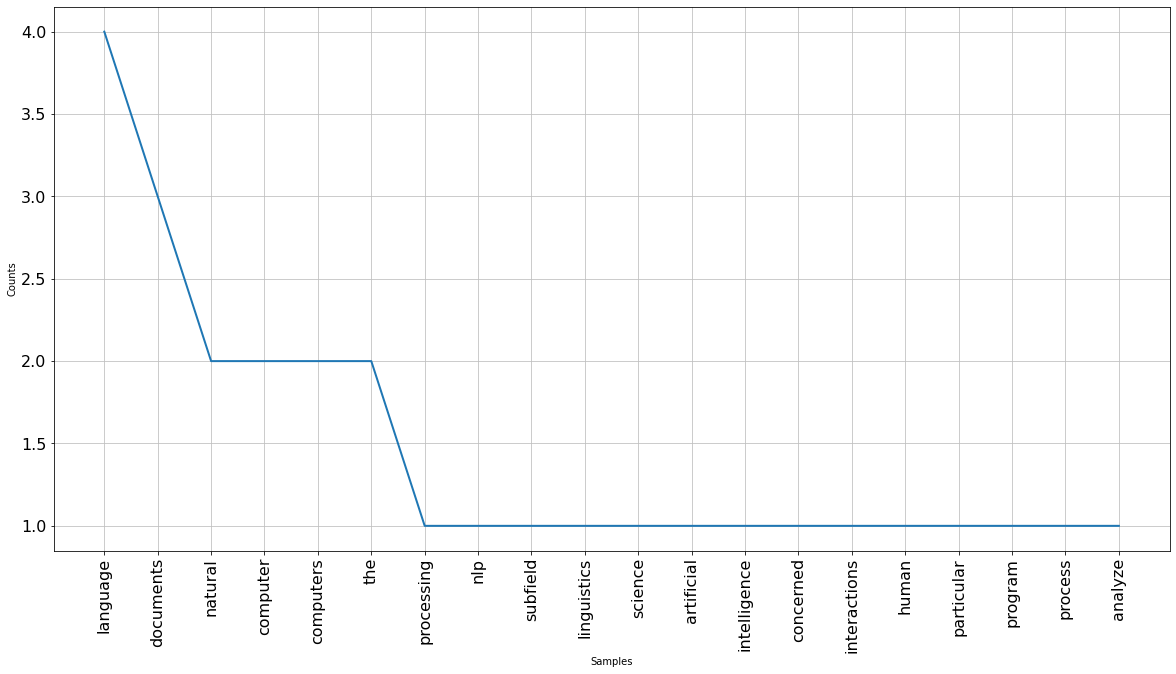

natural:2
language:4
processing:1
nlp:1
subfield:1
linguistics:1
computer:2
science:1
artificial:1
intelligence:1
concerned:1
interactions:1
computers:2
human:1
particular:1
program:1
process:1
analyze:1
large:1
amounts:1
data:1
goal:1
capable:1
understanding:1
contents:1
documents:3
including:1
contextual:1
nuances:1
within:1
technology:1
accurately:1
extract:1
information:1
insights:1
contained:1
the:2
well:1
categorize:1
organize:1


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sr= stopwords.words('english')

clean_tokens = [t for t in processedText.split()]

for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
plt.figure(figsize=(20, 10))
freq.plot(20, cumulative=False)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

## 3- Named Entity Recognition


In [ ]:
import spacy

In [ ]:
#https://spacy.io/models/en#en_core_web_lg
#!python -m spacy download en_core_web_lg
nlp = spacy.load("en_core_web_lg")
nlp.pipe_names


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
doc = nlp("Tesla Inc has acquired Twitter for $45 billion. Elon Musk tells Twitter staff he sold Tesla stock to save Twitter")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
Twitter  |  ORG  |  Companies, agencies, institutions, etc.
$45 billion  |  MONEY  |  Monetary values, including unit
Elon Musk  |  PERSON  |  People, including fictional
Twitter  |  ORG  |  Companies, agencies, institutions, etc.
Tesla  |  ORG  |  Companies, agencies, institutions, etc.
Twitter  |  PRODUCT  |  Objects, vehicles, foods, etc. (not services)


In [ ]:
from spacy import displacy

displacy.render(doc, style="ent")


#### List down all entities

In [ ]:
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

## 4- Part Of Speech

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Tesla Inc has acquired Twitter for $45 billion. Elon Musk tells Twitter staff he sold Tesla stock to save Twitter.")

### POS tags

In [ ]:
for token in doc:
    print(token," | ", token.pos_, " | ", spacy.explain(token.pos_))

Tesla  |  PROPN  |  proper noun
Inc  |  PROPN  |  proper noun
has  |  AUX  |  auxiliary
acquired  |  VERB  |  verb
Twitter  |  PROPN  |  proper noun
for  |  ADP  |  adposition
$  |  SYM  |  symbol
45  |  NUM  |  numeral
billion  |  NUM  |  numeral
.  |  PUNCT  |  punctuation
Elon  |  PROPN  |  proper noun
Musk  |  PROPN  |  proper noun
tells  |  VERB  |  verb
Twitter  |  PROPN  |  proper noun
staff  |  NOUN  |  noun
he  |  PRON  |  pronoun
sold  |  VERB  |  verb
Tesla  |  PROPN  |  proper noun
stock  |  NOUN  |  noun
to  |  PART  |  particle
save  |  VERB  |  verb
Twitter  |  PROPN  |  proper noun
.  |  PUNCT  |  punctuation


https://v2.spacy.io/api/annotation for the complete list of pos categories in spacy.

In [ ]:
for token in doc:
    print(token," | ", token.pos_, " | ", spacy.explain(token.pos_), " | ", token.tag_, " | ", spacy.explain(token.tag_))


Tesla  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular
Inc  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular
has  |  AUX  |  auxiliary  |  VBZ  |  verb, 3rd person singular present
acquired  |  VERB  |  verb  |  VBN  |  verb, past participle
Twitter  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular
for  |  ADP  |  adposition  |  IN  |  conjunction, subordinating or preposition
$  |  SYM  |  symbol  |  $  |  symbol, currency
45  |  NUM  |  numeral  |  CD  |  cardinal number
billion  |  NUM  |  numeral  |  CD  |  cardinal number
.  |  PUNCT  |  punctuation  |  .  |  punctuation mark, sentence closer
Elon  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular
Musk  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular
tells  |  VERB  |  verb  |  VBZ  |  verb, 3rd person singular present
Twitter  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular
staff  |  NOUN  |  noun  |  NN  |  noun, singular or mass
he  |  PRON  |  pronoun  |  PRP  |  pr

### Verb past versus present

In [ ]:
doc = nlp("He played to games")

print(doc[1].text, "|", doc[1].tag_, "|", spacy.explain(doc[1].tag_))


played | VBD | verb, past tense


In [ ]:
doc = nlp("he play each Monday")

print(doc[1].text, "|", doc[1].tag_, "|", spacy.explain(doc[1].tag_))


play | VBP | verb, non-3rd person singular present


# Exercise : NLP basics of wikipedia page

* read an input document line by line.
* Tokenize the line
* Stem the words
* Output the stemmed words (print on screen or write to a file)
* Repeat step 2 to step 4 until it is to the end of the document.
* Page link: 'https://en.wikipedia.org/wiki/FIFA_World_Cup'

### Read the wikipedia page and extract the text
To get text out of HTML we will use a Python library called BeautifulSoup

In [ ]:

import urllib.request
from bs4 import BeautifulSoup
import requests

url = 'https://en.wikipedia.org/wiki/FIFA_World_Cup'

r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')

text = soup.get_text(strip=True)
print(text)

FIFA World Cup - WikipediaFIFA World CupFrom Wikipedia, the free encyclopediaJump to navigationJump to searchAssociation football men's competitionThis article is about the men's association football tournament. For the women's tournament, seeFIFA Women's World Cup. For the ongoing world cup, see2022 FIFA World Cup.Football tournamentFIFA World CupFIFA World Cup TrophyOrganising bodyFIFAFounded1930; 92 years ago(1930)RegionInternationalNumber of teams32 (finals)Current championsFrance(2nd title)(2018)Most successful team(s)Brazil(5 titles)Television broadcastersList of broadcastersWebsitefifa.com/worldcup2022 FIFA World CupFrance, the reigning world championsTournaments1930193419381950195419581962196619701974197819821986199019941998200220062010201420182022202620302034TheFIFA World Cup, often simply called theWorld Cup, is an internationalassociation footballcompetition contested by the seniormen's national teamsof the members of theFédération Internationale de Football Association(FIFA

### Tokenize and Print the tokens

In [ ]:
processedText = re.sub(r'[^a-zA-Z0-9\s]', '', text) # keep only numbers and letters
processedText

'FIFA World Cup  WikipediaFIFA World CupFrom Wikipedia the free encyclopediaJump to navigationJump to searchAssociation football mens competitionThis article is about the mens association football tournament For the womens tournament seeFIFA Womens World Cup For the ongoing world cup see2022 FIFA World CupFootball tournamentFIFA World CupFIFA World Cup TrophyOrganising bodyFIFAFounded1930 92\xa0years ago1930RegionInternationalNumber of teams32 finalsCurrent championsFrance2nd title2018Most successful teamsBrazil5 titlesTelevision broadcastersList of broadcastersWebsitefifacomworldcup2022 FIFA World CupFrance the reigning world championsTournaments1930193419381950195419581962196619701974197819821986199019941998200220062010201420182022202620302034TheFIFA World Cup often simply called theWorld Cup is an internationalassociation footballcompetition contested by the seniormens national teamsof the members of theFdration Internationale de Football AssociationFIFA the International Federation

In [ ]:
tokens = nltk.word_tokenize(processedText, 'english')
print(tokens)

['FIFA', 'World', 'Cup', 'WikipediaFIFA', 'World', 'CupFrom', 'Wikipedia', 'the', 'free', 'encyclopediaJump', 'to', 'navigationJump', 'to', 'searchAssociation', 'football', 'mens', 'competitionThis', 'article', 'is', 'about', 'the', 'mens', 'association', 'football', 'tournament', 'For', 'the', 'womens', 'tournament', 'seeFIFA', 'Womens', 'World', 'Cup', 'For', 'the', 'ongoing', 'world', 'cup', 'see2022', 'FIFA', 'World', 'CupFootball', 'tournamentFIFA', 'World', 'CupFIFA', 'World', 'Cup', 'TrophyOrganising', 'bodyFIFAFounded1930', '92', 'years', 'ago1930RegionInternationalNumber', 'of', 'teams32', 'finalsCurrent', 'championsFrance2nd', 'title2018Most', 'successful', 'teamsBrazil5', 'titlesTelevision', 'broadcastersList', 'of', 'broadcastersWebsitefifacomworldcup2022', 'FIFA', 'World', 'CupFrance', 'the', 'reigning', 'world', 'championsTournaments1930193419381950195419581962196619701974197819821986199019941998200220062010201420182022202620302034TheFIFA', 'World', 'Cup', 'often', 'simpl

### How many tokens ?

In [ ]:
print ("The sample text has {} tokens".format (len(tokens)))

The sample text has 10280 tokens


### Count the occurence of each token

In [ ]:
from collections import Counter
totalWords = Counter(tokens);
totalWords

Counter({'FIFA': 172,
         'World': 331,
         'Cup': 238,
         '-': 7,
         'WikipediaFIFA': 1,
         'CupFrom': 1,
         'Wikipedia': 1,
         ',': 611,
         'the': 535,
         'free': 1,
         'encyclopediaJump': 1,
         'to': 158,
         'navigationJump': 1,
         'searchAssociation': 1,
         'football': 39,
         'men': 5,
         "'s": 80,
         'competitionThis': 1,
         'article': 10,
         'is': 42,
         'about': 5,
         'association': 10,
         'tournament': 60,
         '.': 546,
         'For': 7,
         'women': 6,
         'seeFIFA': 1,
         'Women': 25,
         'ongoing': 1,
         'world': 21,
         'cup': 1,
         'see2022': 1,
         'Cup.Football': 1,
         'tournamentFIFA': 1,
         'CupFIFA': 22,
         'TrophyOrganising': 1,
         'bodyFIFAFounded1930': 1,
         ';': 38,
         '92': 2,
         'years': 7,
         'ago': 1,
         '(': 372,
         '1930': 

### Extract a concordance view of "FIFA" and "Football" words
 A concordance view shows us every occurrence of a given word, together with some context

In [ ]:
from nltk.text import Text
Text(tokens).concordance("Fifa")

Displaying 25 of 178 matches:
 FIFA World Cup - WikipediaFIFA World CupF
 For the ongoing world cup , see2022 FIFA World Cup.Football tournamentFIFA Wo
dcastersWebsitefifa.com/worldcup2022 FIFA World CupFrance , the reigning world
rnationale de Football Association ( FIFA , the International Federation of As
automatically qualify.As of the 2018 FIFA World Cup , twenty-one final tournam
teams1.5Expansion to 48 teams1.62015 FIFA corruption case1.7Biennial World Cup
ennial World Cup proposition1.8Other FIFA tournaments2Trophy3Format3.1Qualific
HistoryMain article : History of the FIFA World CupPrevious international comp
otball , and the official history of FIFA describes the competition as having 
ch Sunderland won . [ 12 ] In 1914 , FIFA agreed to recognise theOlympic tourn
pionships , as 1924 was the start of FIFA 's professional era , and is the rea
f the Olympic football tournaments , FIFA , withPresidentJules Rimetas the dri
 the Olympics . On 28 May 1928 , the FIFA Congress inAmste

### Remove punctuation

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
word_tokens = tokenizer.tokenize(text)

In [ ]:
print(word_tokens)

['FIFA', 'World', 'Cup', 'WikipediaFIFA', 'World', 'CupFrom', 'Wikipedia', 'the', 'free', 'encyclopediaJump', 'to', 'navigationJump', 'to', 'searchAssociation', 'football', 'men', 's', 'competitionThis', 'article', 'is', 'about', 'the', 'men', 's', 'association', 'football', 'tournament', 'For', 'the', 'women', 's', 'tournament', 'seeFIFA', 'Women', 's', 'World', 'Cup', 'For', 'the', 'ongoing', 'world', 'cup', 'see2022', 'FIFA', 'World', 'Cup', 'Football', 'tournamentFIFA', 'World', 'CupFIFA', 'World', 'Cup', 'TrophyOrganising', 'bodyFIFAFounded1930', '92', 'years', 'ago', '1930', 'RegionInternationalNumber', 'of', 'teams32', 'finals', 'Current', 'championsFrance', '2nd', 'title', '2018', 'Most', 'successful', 'team', 's', 'Brazil', '5', 'titles', 'Television', 'broadcastersList', 'of', 'broadcastersWebsitefifa', 'com', 'worldcup2022', 'FIFA', 'World', 'CupFrance', 'the', 'reigning', 'world', 'championsTournaments1930193419381950195419581962196619701974197819821986199019941998200220062

### Remove stopwords

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

filtered_tokens = [w for w in word_tokens if not w.lower() in stop_words]

filtered_tokens = []

for w in word_tokens:
    if w not in stop_words:
        filtered_tokens.append(w)

print(filtered_tokens)

['FIFA', 'World', 'Cup', 'WikipediaFIFA', 'World', 'CupFrom', 'Wikipedia', 'free', 'encyclopediaJump', 'navigationJump', 'searchAssociation', 'football', 'men', 'competitionThis', 'article', 'men', 'association', 'football', 'tournament', 'For', 'women', 'tournament', 'seeFIFA', 'Women', 'World', 'Cup', 'For', 'ongoing', 'world', 'cup', 'see2022', 'FIFA', 'World', 'Cup', 'Football', 'tournamentFIFA', 'World', 'CupFIFA', 'World', 'Cup', 'TrophyOrganising', 'bodyFIFAFounded1930', '92', 'years', 'ago', '1930', 'RegionInternationalNumber', 'teams32', 'finals', 'Current', 'championsFrance', '2nd', 'title', '2018', 'Most', 'successful', 'team', 'Brazil', '5', 'titles', 'Television', 'broadcastersList', 'broadcastersWebsitefifa', 'com', 'worldcup2022', 'FIFA', 'World', 'CupFrance', 'reigning', 'world', 'championsTournaments1930193419381950195419581962196619701974197819821986199019941998200220062010201420182022202620302034TheFIFA', 'World', 'Cup', 'often', 'simply', 'called', 'theWorld', 'Cup'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/afillatre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language="english")
stems = [stemmer.stem(t) for t in filtered_tokens]
print(stems)

['fifa', 'world', 'cup', 'wikipediafifa', 'world', 'cupfrom', 'wikipedia', 'free', 'encyclopediajump', 'navigationjump', 'searchassoci', 'footbal', 'men', 'competitionthi', 'articl', 'men', 'associ', 'footbal', 'tournament', 'for', 'women', 'tournament', 'seefifa', 'women', 'world', 'cup', 'for', 'ongo', 'world', 'cup', 'see2022', 'fifa', 'world', 'cup', 'footbal', 'tournamentfifa', 'world', 'cupfifa', 'world', 'cup', 'trophyorganis', 'bodyfifafounded1930', '92', 'year', 'ago', '1930', 'regioninternationalnumb', 'teams32', 'final', 'current', 'championsfr', '2nd', 'titl', '2018', 'most', 'success', 'team', 'brazil', '5', 'titl', 'televis', 'broadcasterslist', 'broadcasterswebsitefifa', 'com', 'worldcup2022', 'fifa', 'world', 'cupfranc', 'reign', 'world', 'championstournaments1930193419381950195419581962196619701974197819821986199019941998200220062010201420182022202620302034thefifa', 'world', 'cup', 'often', 'simpli', 'call', 'theworld', 'cup', 'internationalassoci', 'footballcompetit',

### Print the words frequency distribution

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/afillatre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


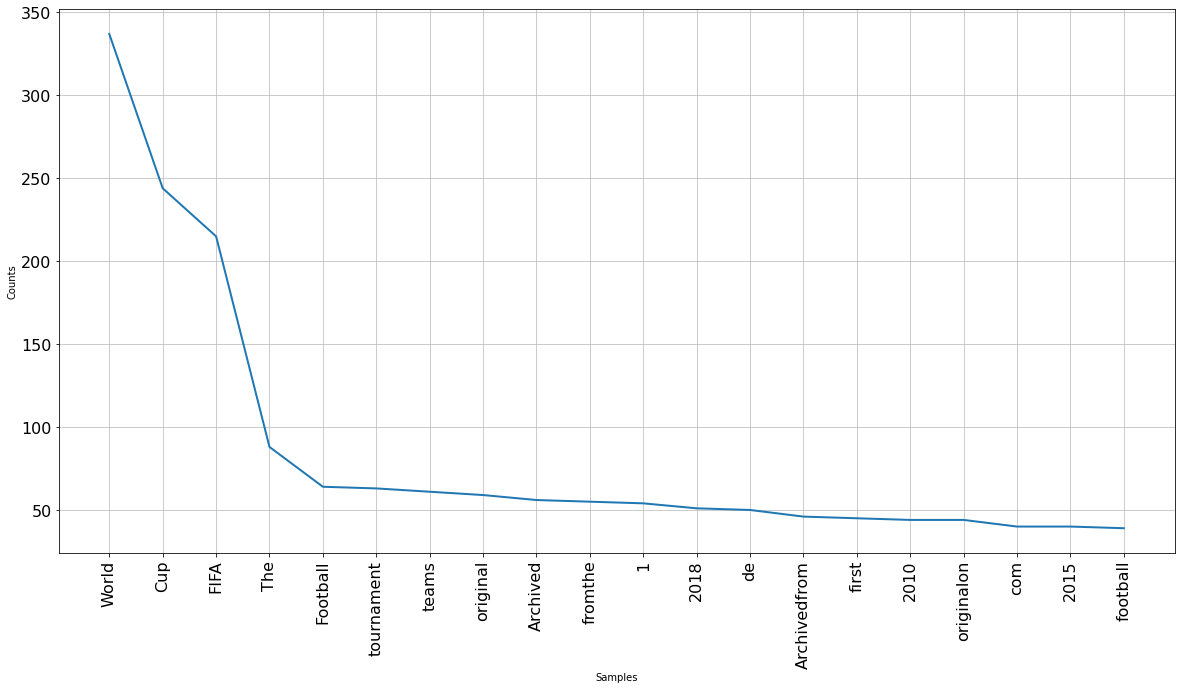

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

#clean_tokens_wikipediapage = filtered_tokens[:]

freq = nltk.FreqDist(filtered_tokens)
plt.figure(figsize=(20, 10))
freq.plot(20, cumulative=False)


### Text Mining with Word Cloud

#!pip install wordcloud

In [ ]:

nondigit_output = ' '.join(c for c in filtered_tokens if not c.isdigit())

In [ ]:
print(nondigit_output)

FIFA World Cup WikipediaFIFA World CupFrom Wikipedia free encyclopediaJump navigationJump searchAssociation football men competitionThis article men association football tournament For women tournament seeFIFA Women World Cup For ongoing world cup see2022 FIFA World Cup Football tournamentFIFA World CupFIFA World Cup TrophyOrganising bodyFIFAFounded1930 years ago RegionInternationalNumber teams32 finals Current championsFrance 2nd title Most successful team Brazil titles Television broadcastersList broadcastersWebsitefifa com worldcup2022 FIFA World CupFrance reigning world championsTournaments1930193419381950195419581962196619701974197819821986199019941998200220062010201420182022202620302034TheFIFA World Cup often simply called theWorld Cup internationalassociation footballcompetition contested seniormen national teamsof members theFédération Internationale de Football Association FIFA International Federation Association Football sport global governing body The championship awarded e

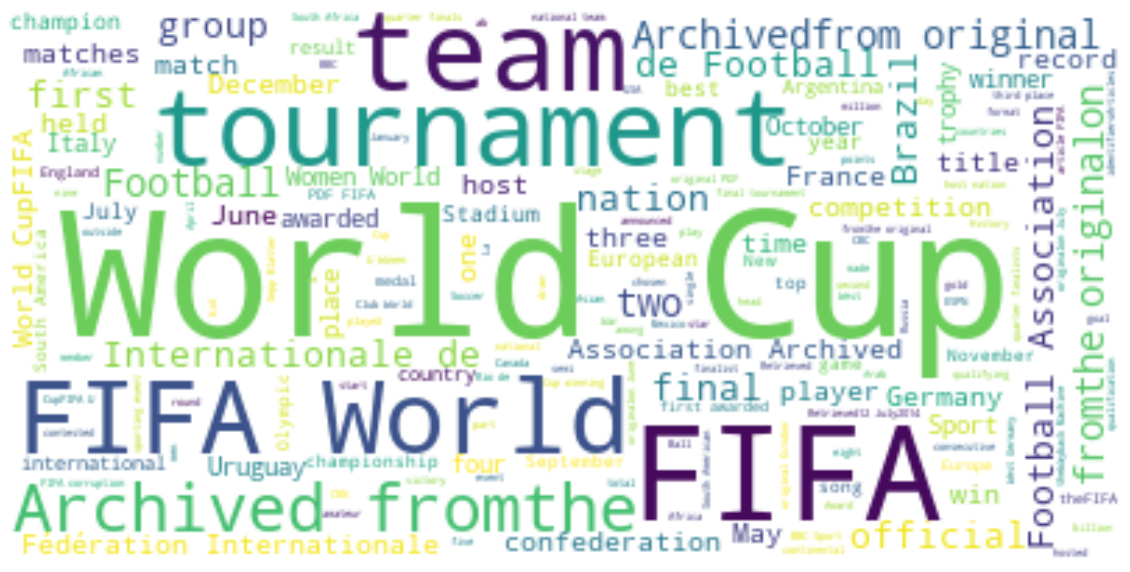

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#tokens = "'FIFA', 'World', 'Cup', 'WikipediaFIFA', 'World', 'CupFrom', 'Wikipedia', 'the', 'free', 'encyclopediaJump', 'to', 'navigationJump', 'to', 'searchAssociation', 'football', 'men', 's', 'competitionThis', 'article', 'is', 'about', 'the', 'men', 's', 'association', 'football', 'tournament', 'For', 'the', 'women', 's', 'tournament', 'seeFIFA', 'Women', 's', 'World', 'Cup', 'For', 'the', 'ongoing', 'world', 'cup', 'see2022', 'FIFA', 'World', 'Cup', 'Football', 'tournamentFIFA', 'World'"
wordcloud_FIFA_wikipedia_page = WordCloud(background_color="white").generate(nondigit_output)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_FIFA_wikipedia_page, interpolation='bilinear')
plt.axis("off")
plt.show()